

# Project: Investigate a Dataset - [TMDb Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview
To complete my Data Analysis project I will be using the TMDb movie dataset.

This dataset contains information about 10 thousand movies including user ratings and revenue, this dataset collected from The Movie Database (TMDb). It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

### Question(s) for Analysis
##### The number of movies each year ?!
##### Budget vs vote average in one year!
##### What are the features associated with top 20 revenue movies?
##### Duration of the movie vs Popularity
##### Which genres have the highest rate?
 

In [45]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  After loading the datset, I will use Pandas to explore some helpful methods for assessing and building intuition about the dataset, then I will proceed with the cleaning process to include only the relavent data related to the questions I will apply on the dataset for the analysis process and delete the unused data.


### General Properties
>  load my dataset to explore data. 

In [46]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_mov=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df_mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## checking the null values

In [48]:
df_mov.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [49]:
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### remove the null values

In [50]:
df_mov.dropna(axis=0, inplace=True)
df_mov.drop(columns=['overview','homepage','tagline','keywords','production_companies','cast'], inplace=True)


### check data  after remove null values

In [51]:
df_mov.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### check duplicated() data

In [52]:
df_mov.duplicated().sum()

0

In [53]:
df_mov.shape

(1992, 15)

### create new dataframe to split genres movies

In [54]:

df_mov_genres=(df_mov.drop('genres',axis=1).join(df_mov['genres'].str.split('|', expand=True).stack().reset_index(level=1,drop=True).rename('genres')).loc[:,df_mov.columns])
df_mov_genres.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [55]:
df_mov_genres.shape

(5123, 15)

### before answering some question lets examine our data

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

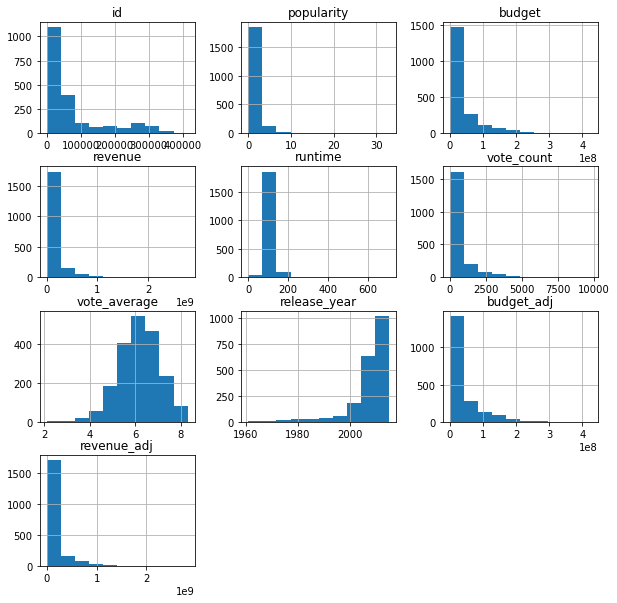

In [56]:
df_mov.hist(figsize=(10,10))

<a id='eda'></a>
# Exploratory Data Analysis



### Research Question 1 (The number of movies each year ?!)

In [57]:
df_year=df_mov.groupby('release_year')['id'].sum()
df_year

release_year
1961         430
1962         646
1963         657
1964        1362
1965         660
1967         667
1969         668
1970        5722
1971       27489
1972         238
1973        9805
1974        2092
1975       38025
1976       58254
1977      251182
1978       39594
1979       11700
1980        2681
1981       34439
1982        1770
1983       49123
1984       21967
1985       21211
1986       27515
1987      118386
1988       84161
1989       20722
1990       16059
1991       17012
1992       16168
1993       87070
1994       51440
1995       36098
1996       70974
1997       76249
1998      102894
1999      135702
2000      230881
2001      423879
2002      182626
2003      332205
2004      382852
2005      656906
2006      617382
2007      978197
2008     1859743
2009     4942611
2010     8430657
2011    13001605
2012    12368428
2013    18087490
2014    34014123
2015    44780670
Name: id, dtype: int64

## As the years go by, the number of movies is increasing
### The year 2015 is the largest year in which he produced films and the number of them 44780670

Text(0.5, 0, 'year')

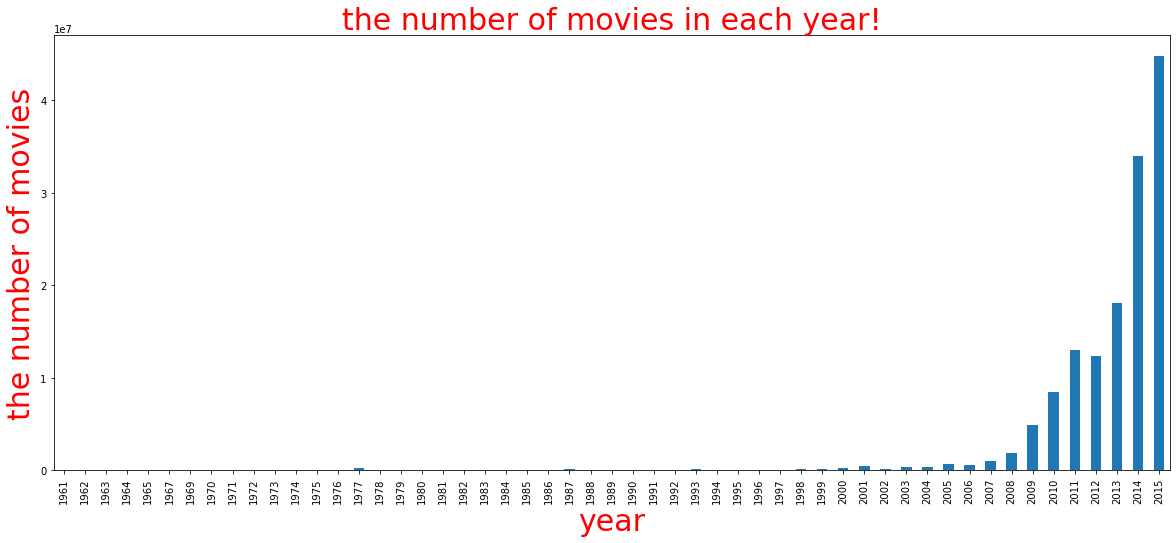

In [58]:
df_year.plot(kind='bar',figsize=(20,8))
plt.title('the number of movies in each year!',color='red',fontsize=30)
plt.ylabel('the number of movies',color='red',fontsize=30)
plt.xlabel('year',color='red',fontsize=30)

### Research Question 2  ( Budget vs  vote average in one year!)
#### Exploring the budget on the success of the film and chose to be in one year due to the difference in financial value over the years 

In [59]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_year2010=df_mov[df_mov['release_year']==2010][['budget','vote_average']]
df_year2010

,budget,vote_average
1919,160000000,7.9
1920,200000000,6.6
1921,200000000,6.3
1922,13000000,7.1
1923,250000000,7.4
...,...,...
2367,0,7.0
2375,0,5.5
2387,35000000,6.6
2389,0,8.1


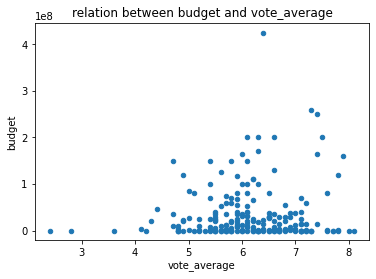

In [60]:
df_year2010.plot(x='vote_average',y='budget',kind='scatter',title='relation between budget and vote_average');

### Research Question 3 (What are the features associated with top 20 revenue movies??)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

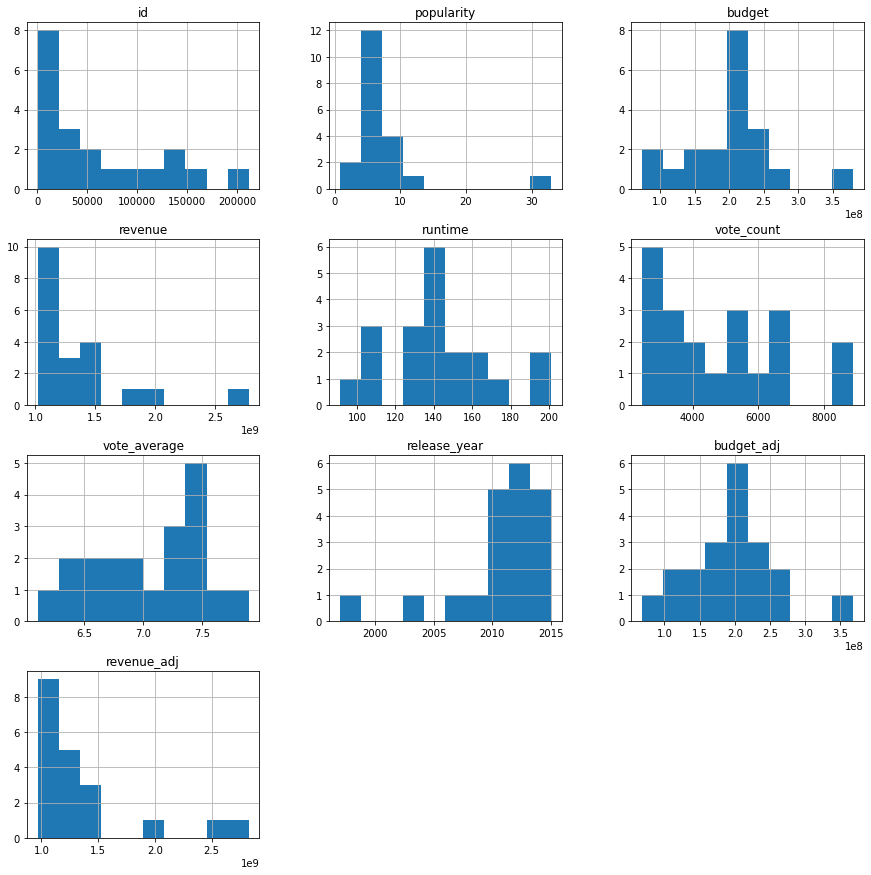

In [61]:
top20_revenue = df_mov.nlargest(20, 'revenue')
top20_revenue.hist(figsize=(15,15))

### Research Question 4 (Duration of the movie vs Popularity)

In [62]:
short = df_mov.query('runtime < {}'.format(100))
medium = df_mov.query('runtime < {}'.format(200))
large = df_mov.query('runtime > {}'.format(200))
mean_short = short['popularity'].mean()
mean_medium = medium['popularity'].mean()
mean_large = large['popularity'].mean()


Text(0, 0.5, 'Average popularity')

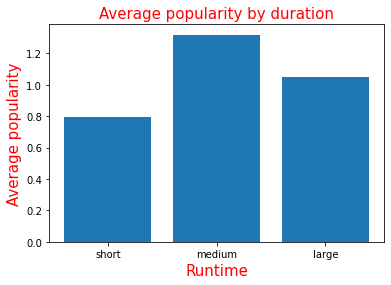

In [63]:
locations = [1,2,3]
heights = [mean_short, mean_medium, mean_large]
labels = ['short', 'medium','large']
plt.bar(locations, heights,tick_label= labels)
plt.title('Average popularity by duration',fontsize=15,color='red')
plt.xlabel('Runtime',fontsize=15,color='red')
plt.ylabel('Average popularity',fontsize=15,color='red')


### Conclude that popularity tends to movies of medium duration 

### Research Question 5 (Which genres have the highest rate?)

In [64]:
genres_vote = df_mov_genres.groupby(['genres'])['vote_average'].mean()
print(genres_vote)

genres
Action             6.103195
Adventure          6.317729
Animation          6.477059
Comedy             6.016094
Crime              6.312214
Documentary        6.959140
Drama              6.365752
Family             6.285837
Fantasy            6.175248
Foreign            6.683333
History            6.580357
Horror             5.499267
Music              6.636111
Mystery            6.110811
Romance            6.225086
Science Fiction    6.070447
TV Movie           5.800000
Thriller           5.983304
War                6.609091
Western            6.115000
Name: vote_average, dtype: float64


Text(0.5, 0, 'genres of movies')

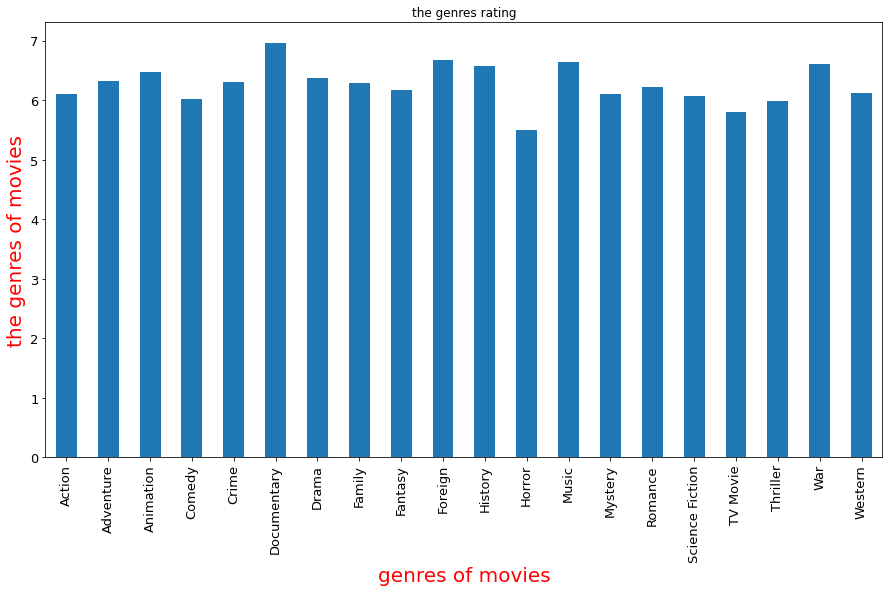

In [65]:
plt.subplots(figsize=(15,8))
genres_vote.plot(kind='bar',title="the genres rating",fontsize=13)
plt.ylabel('the genres of movies',color='red',fontsize=20)
plt.xlabel('genres of movies',color='red',fontsize=20)

<a id='conclusions'></a>
## Conclusions
### Research Question 1 (The number of movies each year ?!)
###### As the years go by, the number of movies is increasing
The year 2015 is the largest year in which he produced films and the number of them 44780670
### Research Question 2 ( Budget vs vote average in one year!)
Exploring the budget on the success of the film and chose to be in one year due to the difference in financial value over the years

###  Research Question 3 (What are the features associated with top 20 revenue movies??)
 
###  Research Question 4 (Duration of the movie vs Popularity)
Conclude that popularity tends to movies of medium duration
###  Research Question 5 (Which genres have the highest rate?)
Documentary movies has the highest vote 
### Limitations

All results are limited to the underlying data set and as no advaned statistics were performed, the results can only be treated as indicators and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data.